# SUOD - Scalable Unsupervised Outlier Detection
### SUOD is an acceleration framework for large scale unsupervised outlier detector training and prediction
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.suod

### Arguments that work with SUOD algorithm:
1. base_estimators
2. contamination
3. combination
4. n_jobs
5. rp_clf_list
6. rp_ng_clf_list
7. rp_flag_global
8. target_dim_frac
9. jl_method
10. bps_flag
11. approx_clf_list
12. approx_ng_clf_list
13. approx_flag_global
14. approx_clf
15. cost_forecast_loc_fit
16. cost_forecast_loc_pred
17. verbose

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   179.140643 seconds
image downsampling       ...took     6.418916 seconds
image downsampling       ...took    11.725320 seconds
image downsampling       ...took    14.094851 seconds
image downsampling       ...took    16.464677 seconds
image downsampling       ...took    21.750863 seconds
image downsampling       ...took    27.282580 seconds
image downsampling       ...took    32.593165 seconds
image downsampling       ...took    34.957927 seconds
image downsampling       ...took    42.028191 seconds
image downsampling       ...took    44.389379 seconds
image downsampling       ...took    46.763471 seconds
image downsampling       ...took    49.159786 seconds
image downsampling       ...took    51.503012 seconds
image downsampling       ...took    56.831548 seconds
image downsampling       ...took    62.128793 seconds
image downsampling       ...took    76.049636 seconds
image downsampling       ...took    78.408983 seconds
image downsampling       ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.9s finished


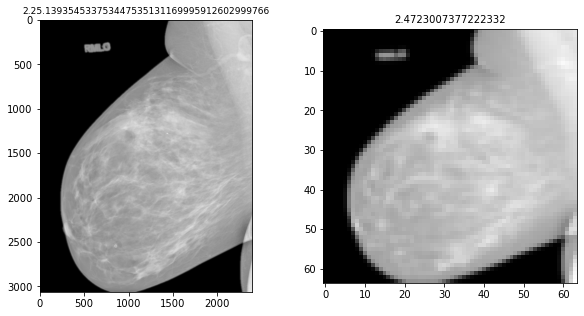

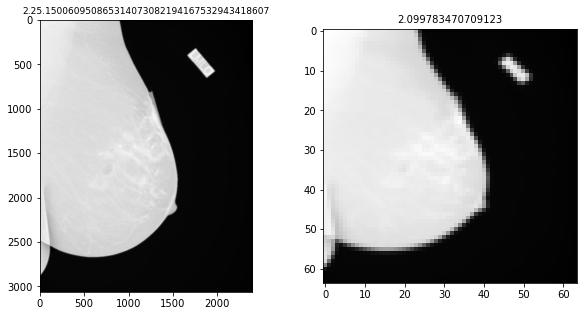

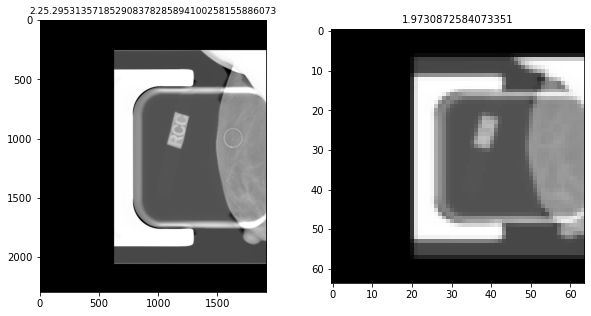

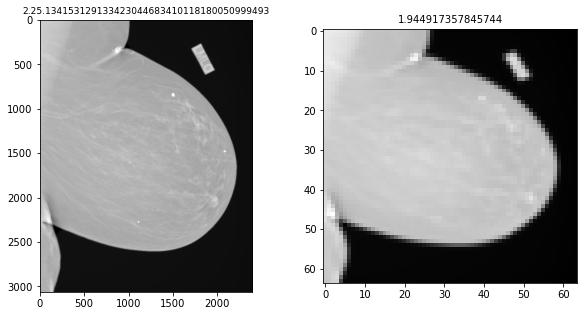

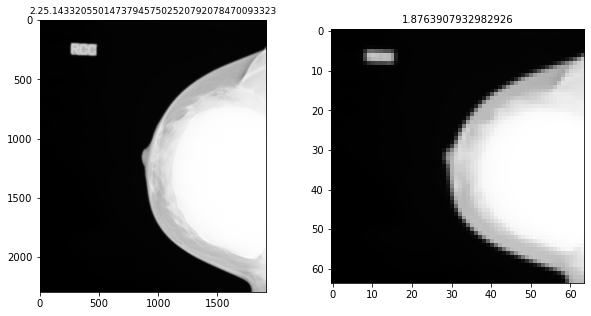

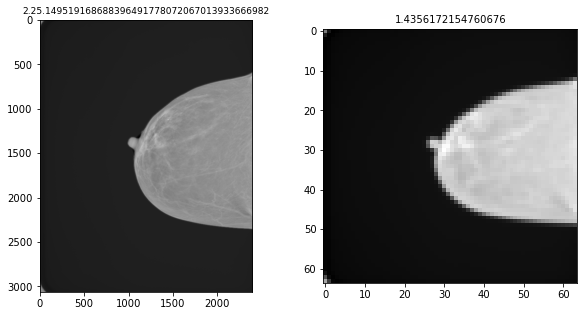

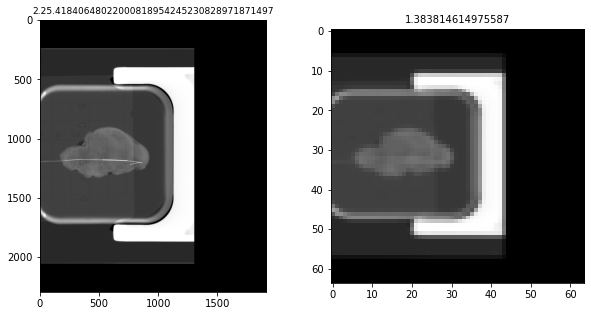

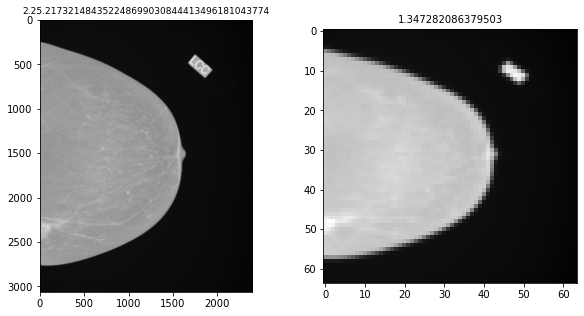

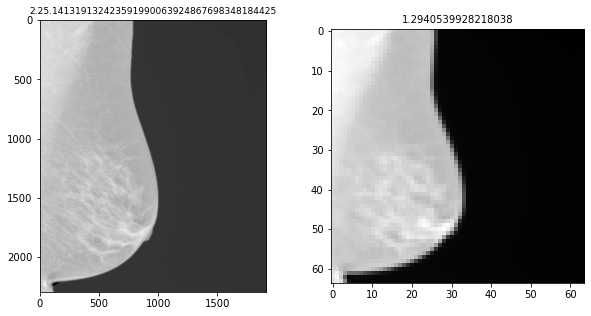

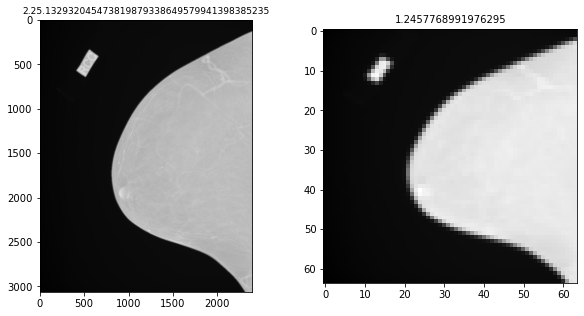

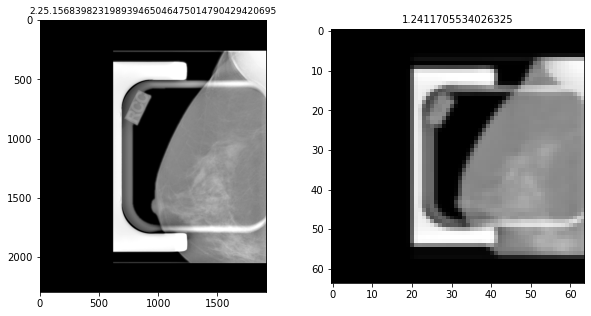

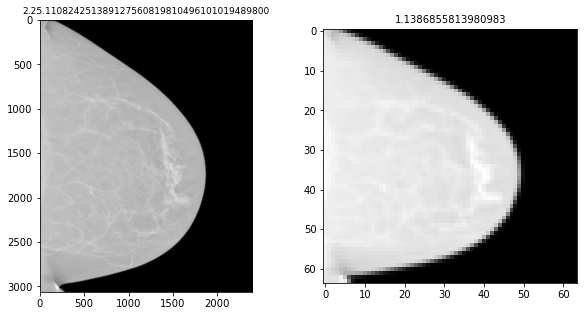

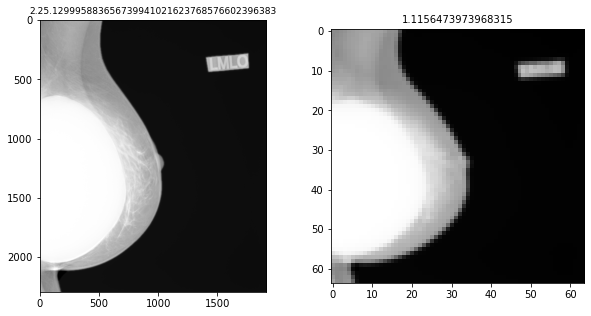

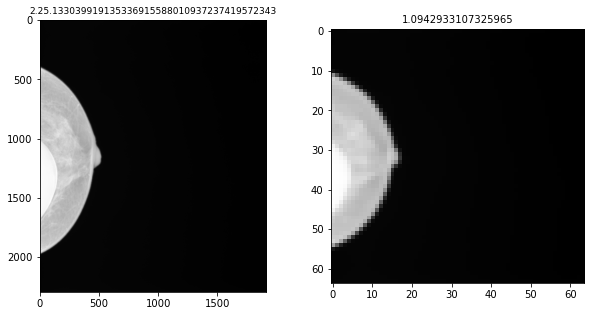

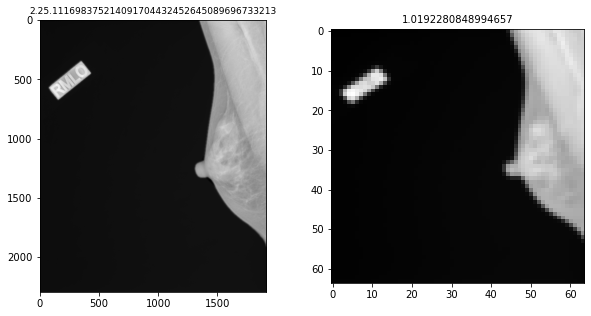

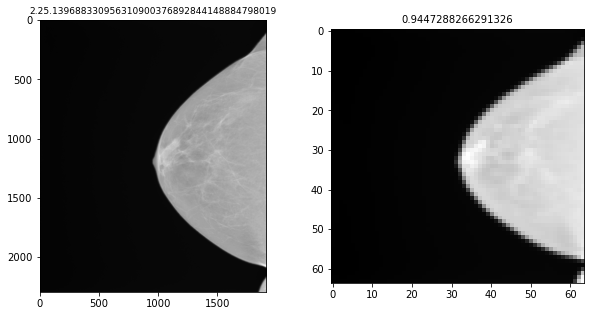

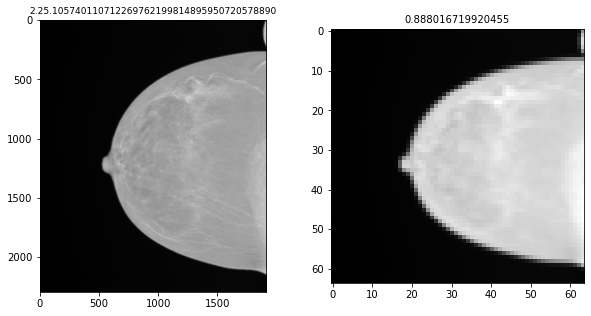

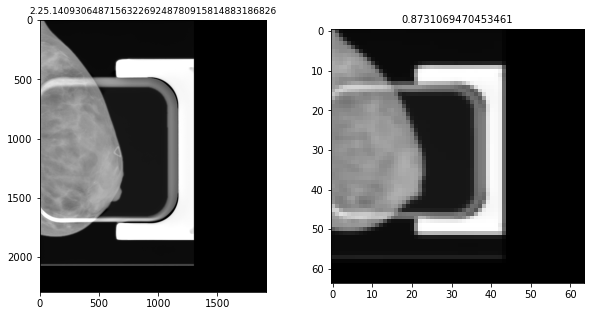

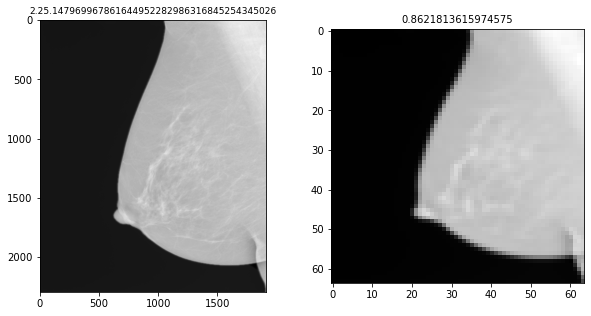

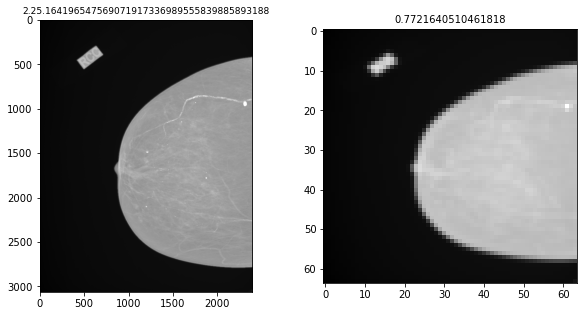

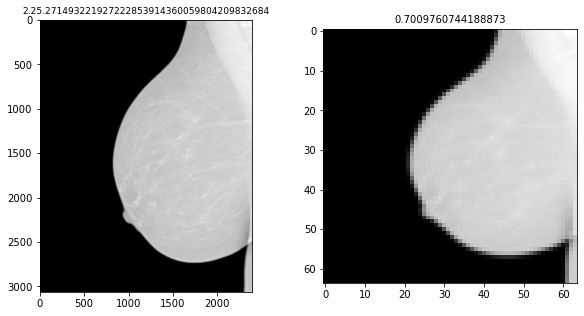

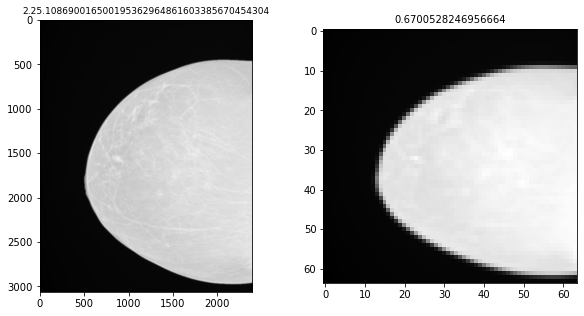

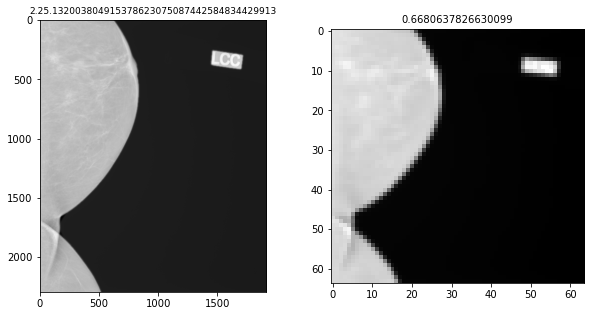

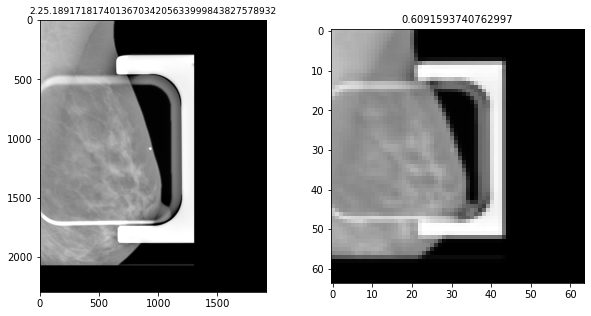

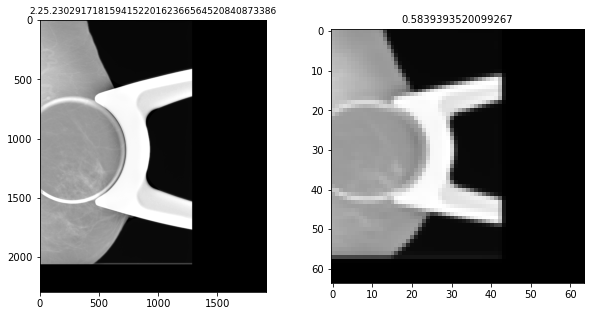

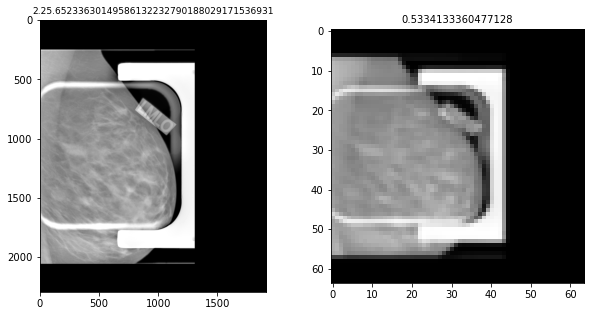

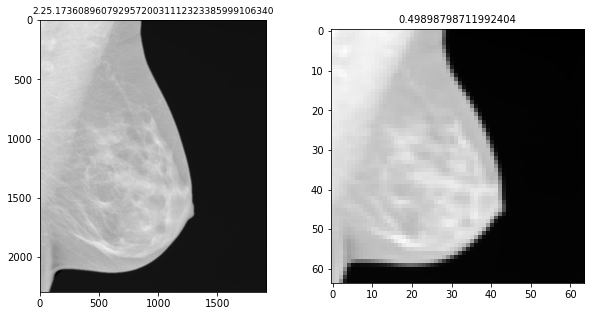

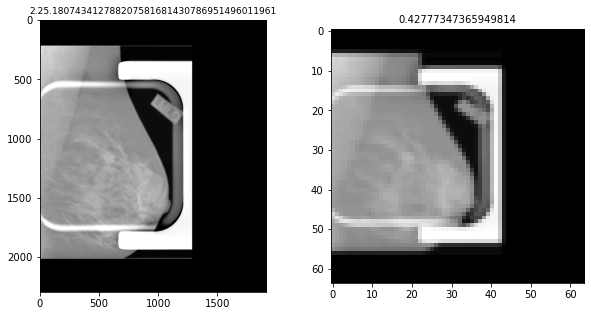

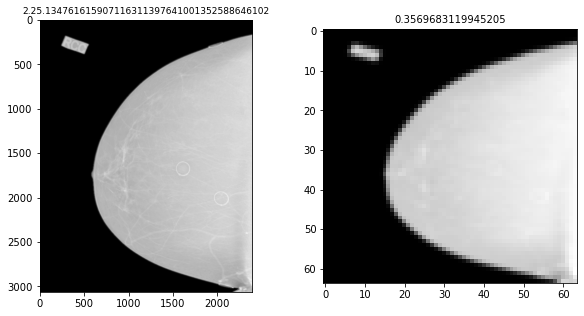

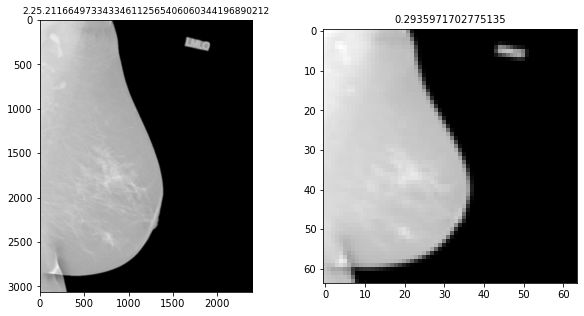

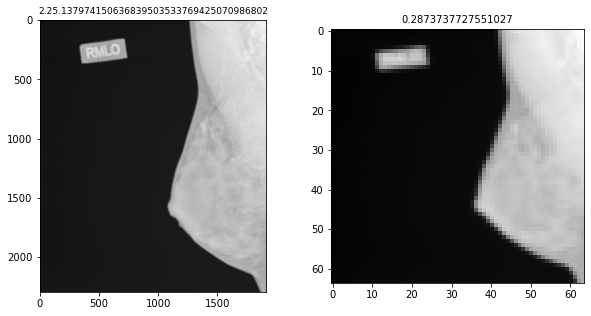

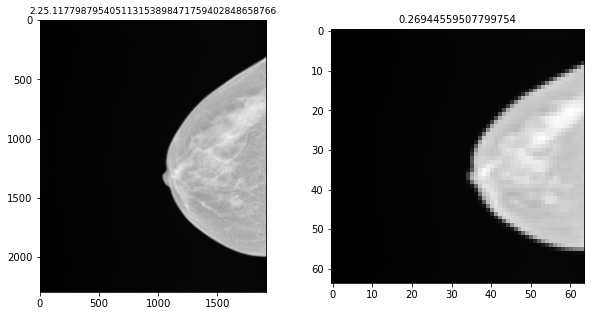

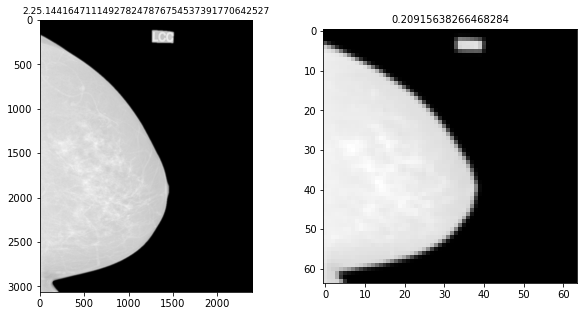

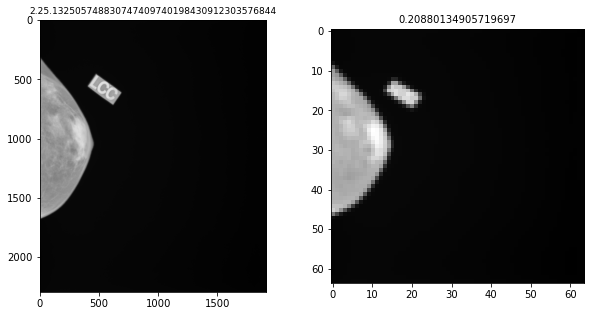

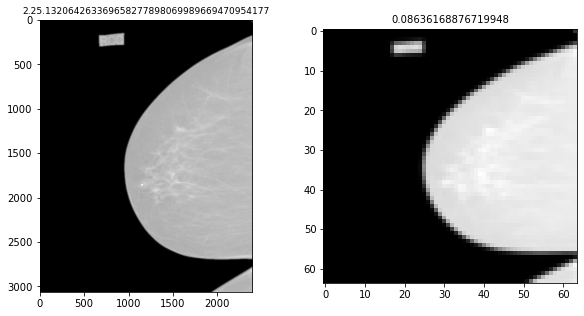

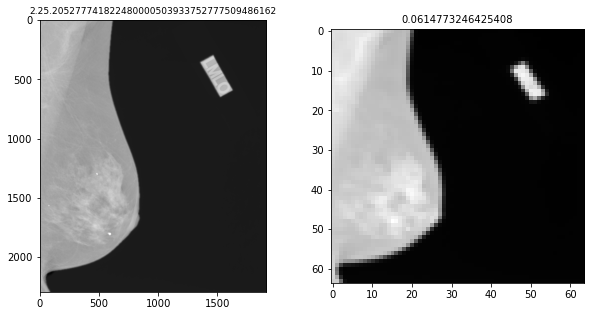

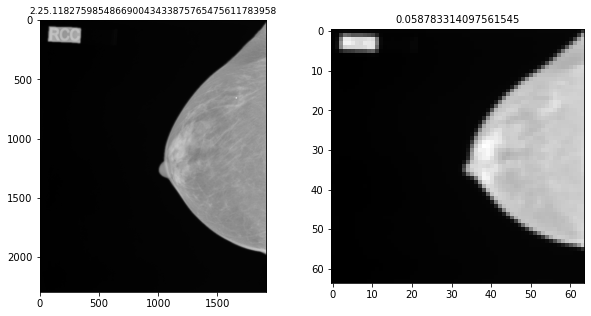

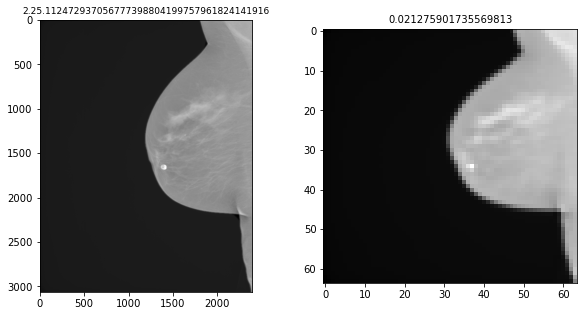

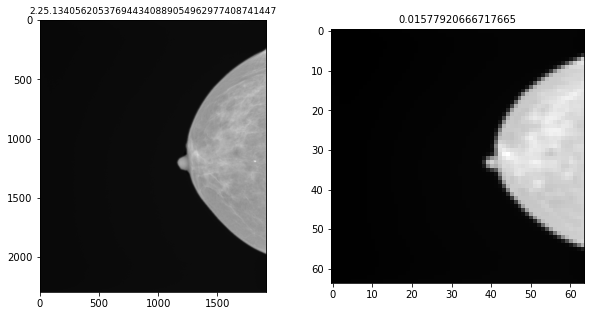

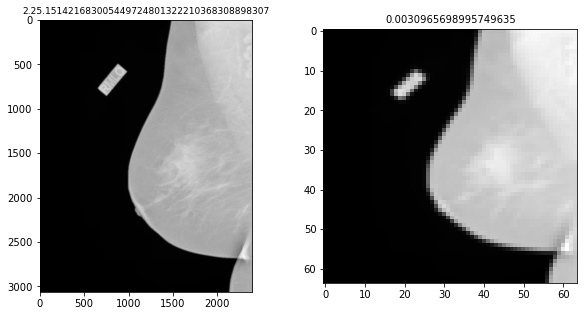

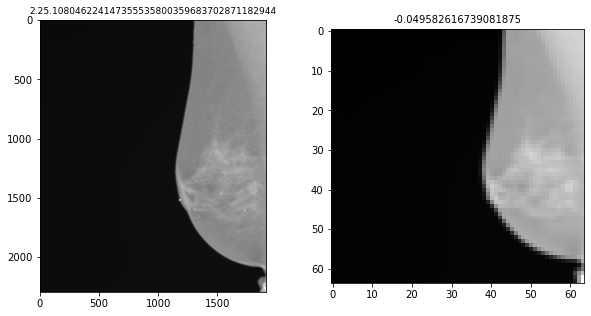

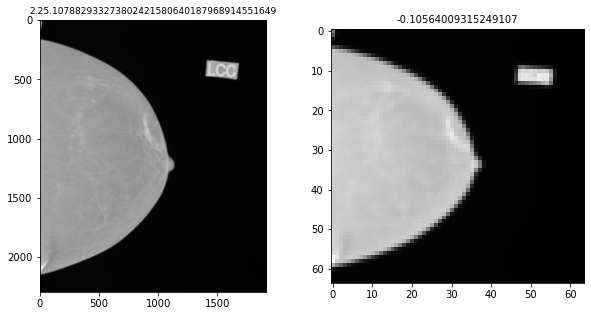

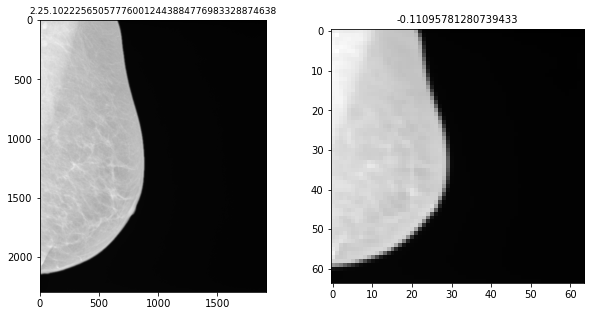

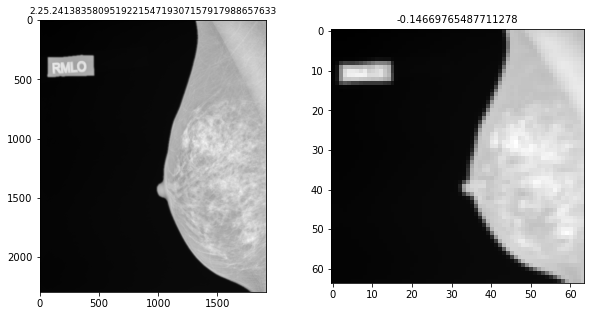

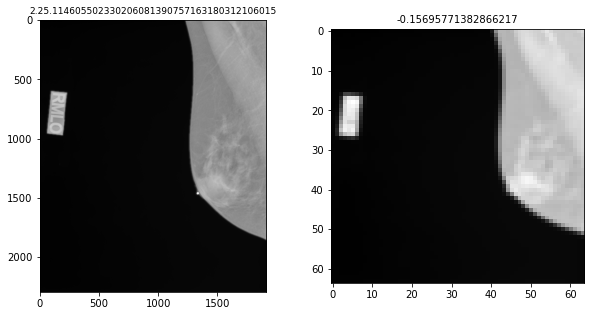

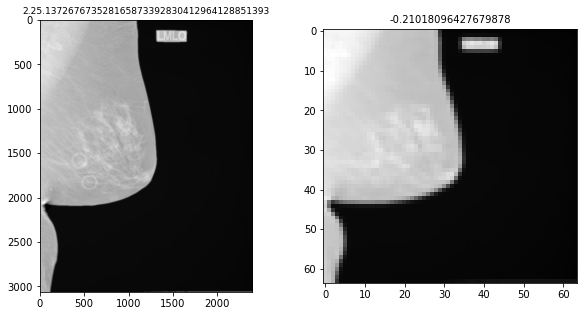

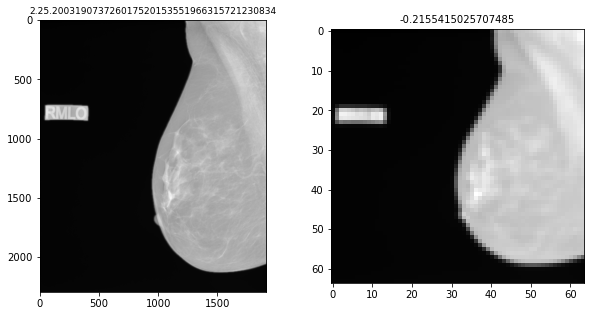

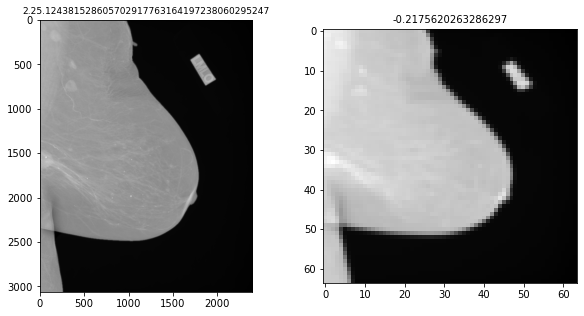

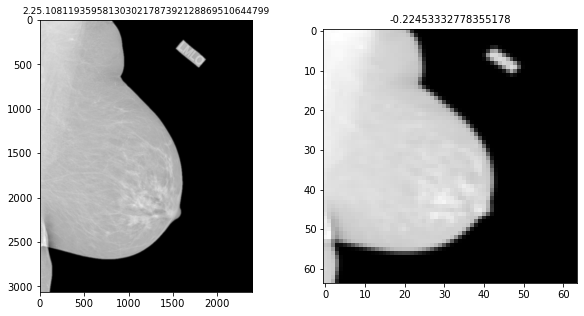

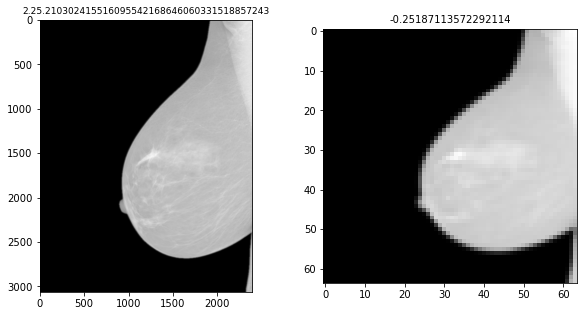

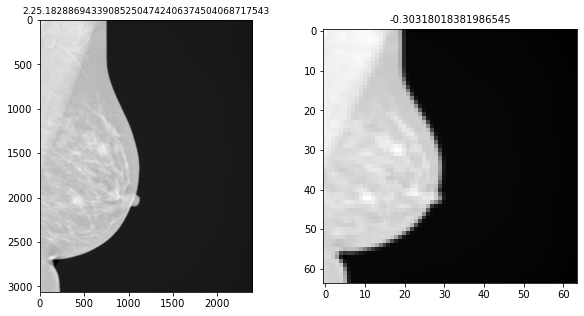

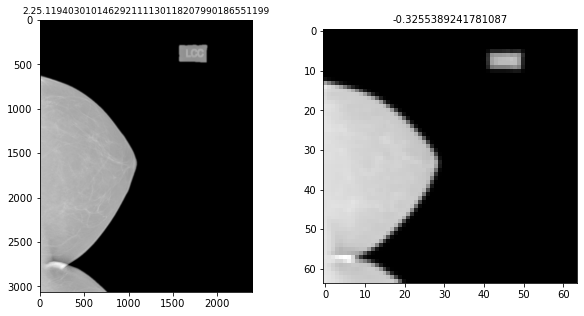

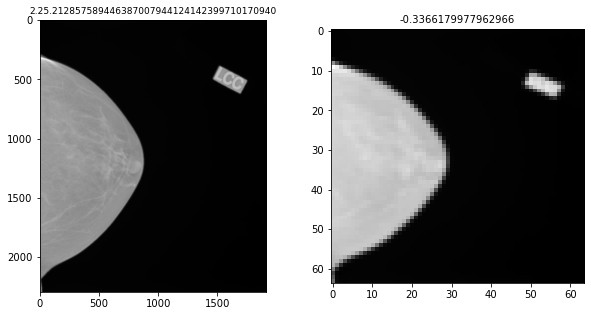

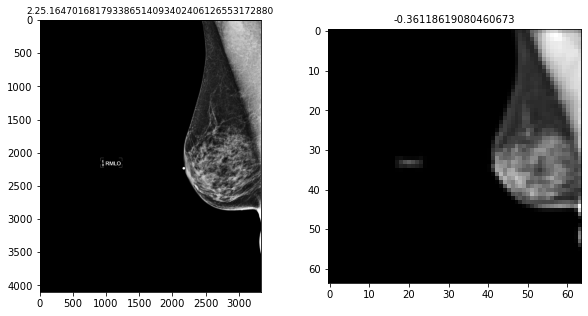

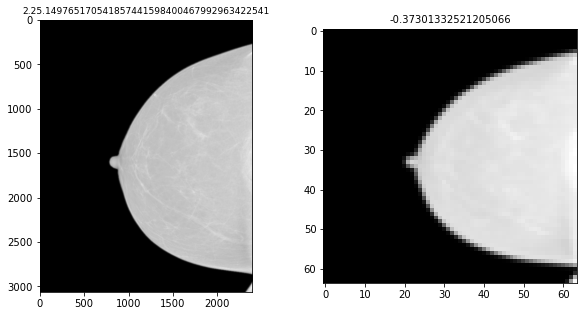

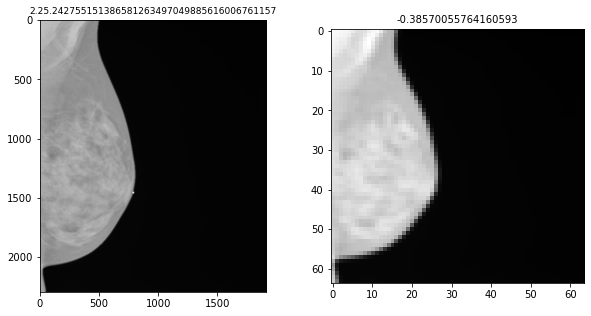

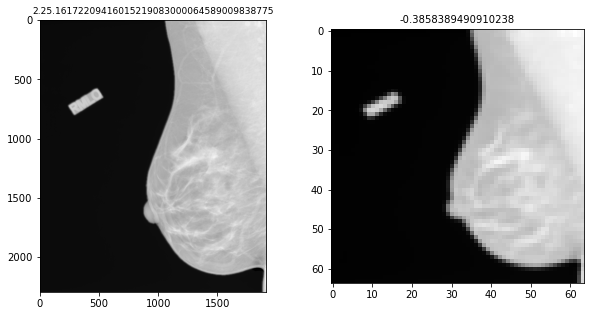

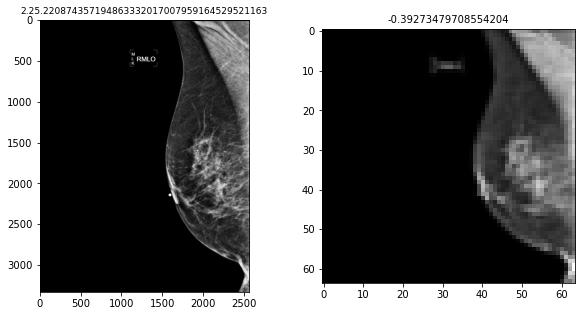

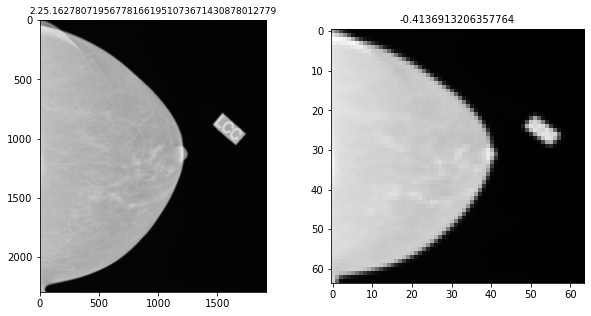

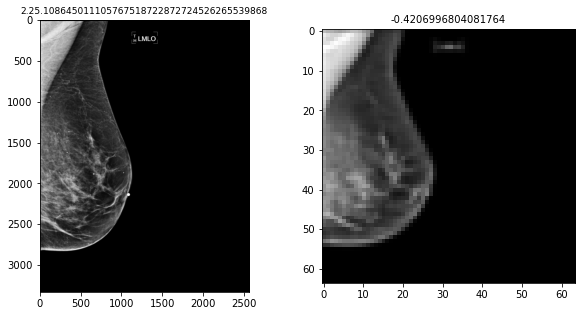

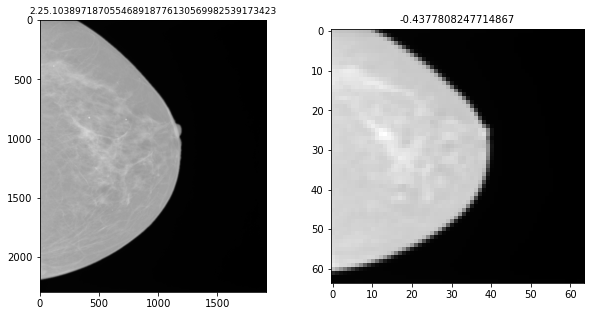

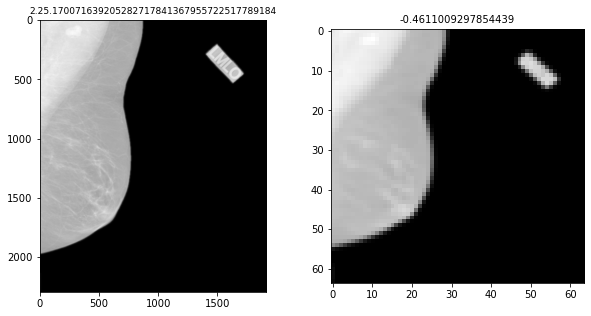

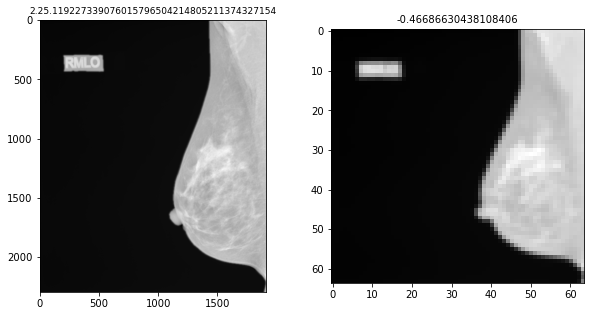

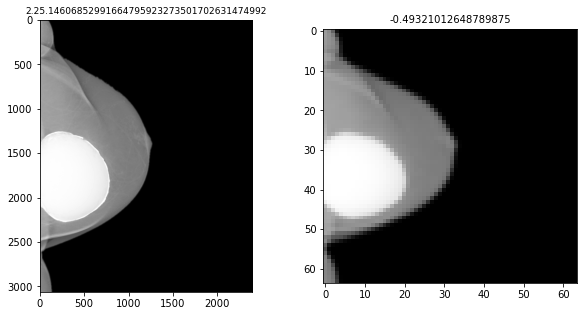

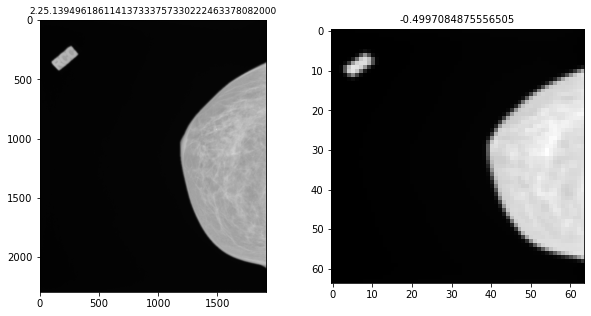

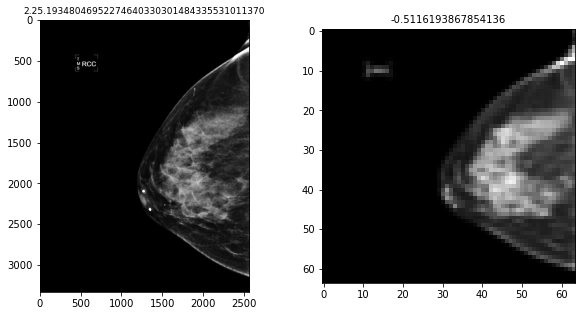

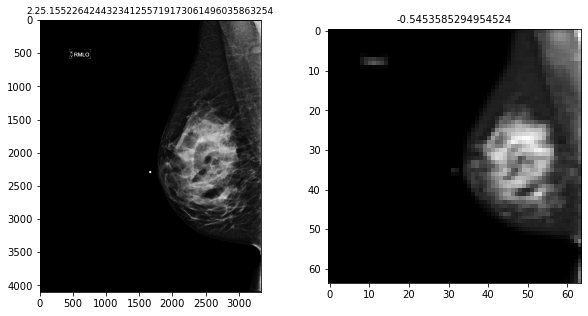

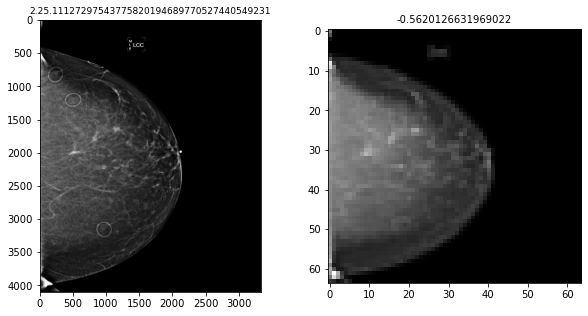

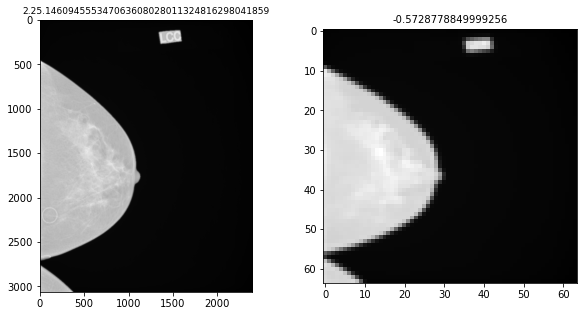

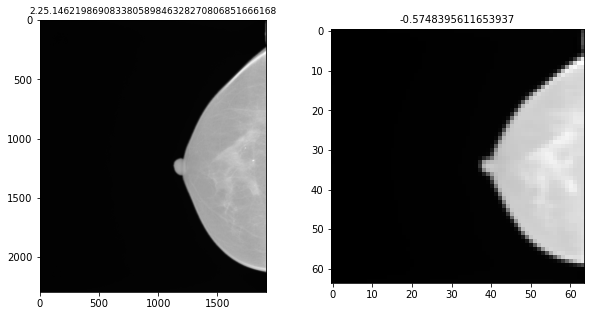

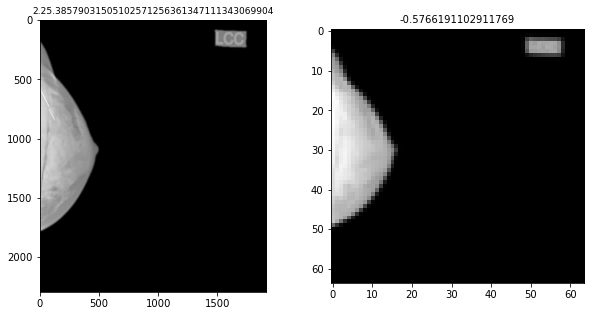

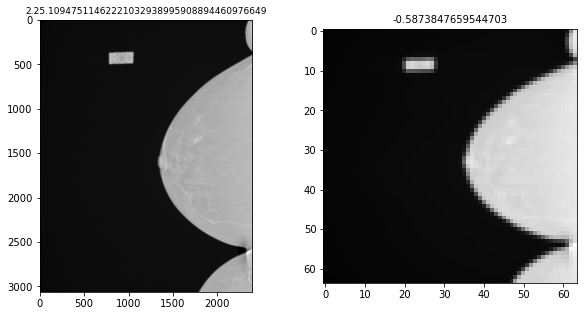

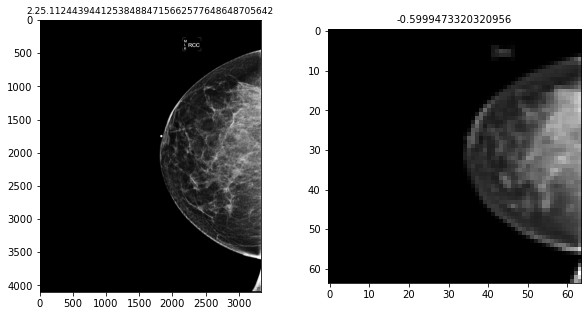

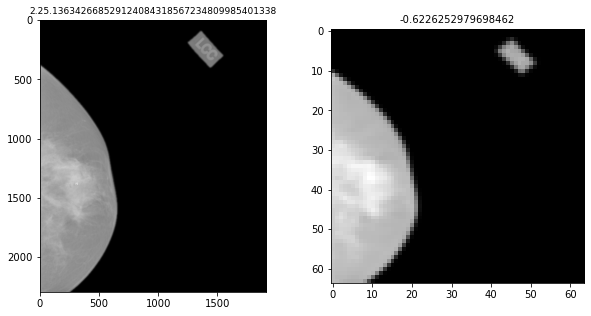

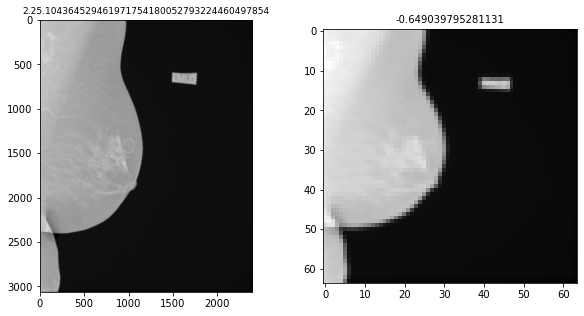

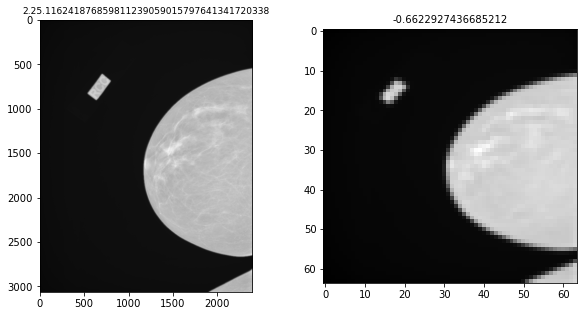

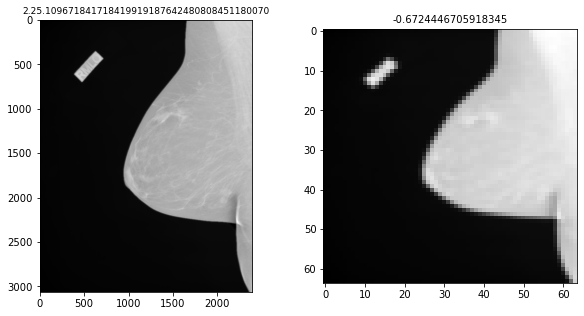

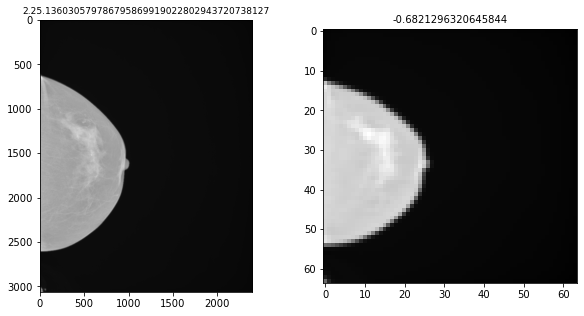

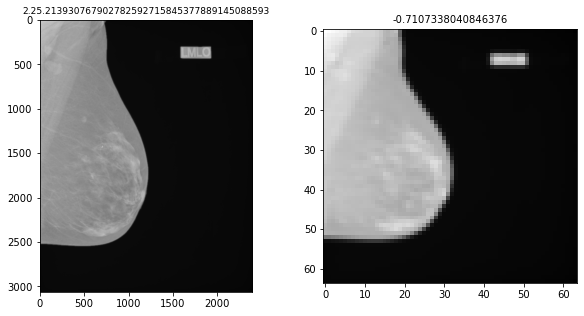

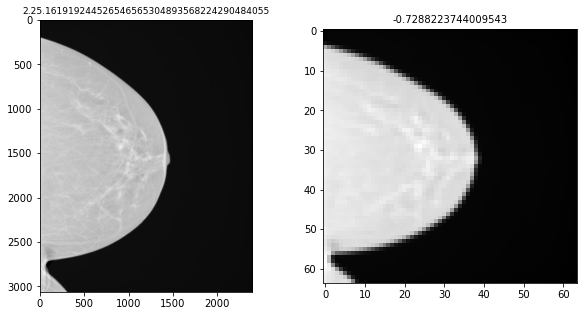

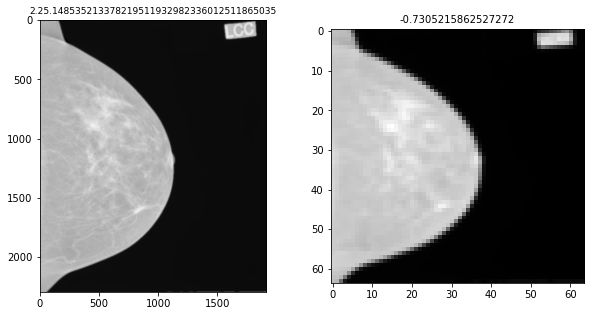

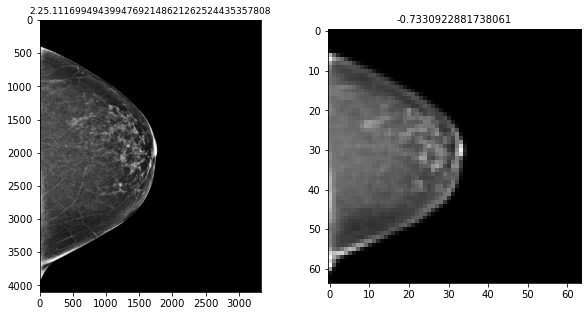

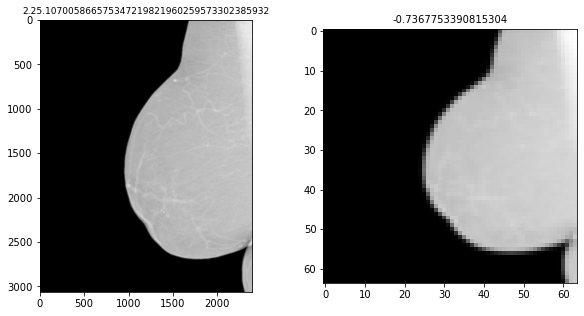

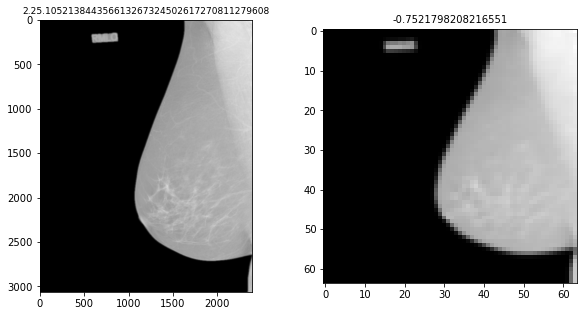

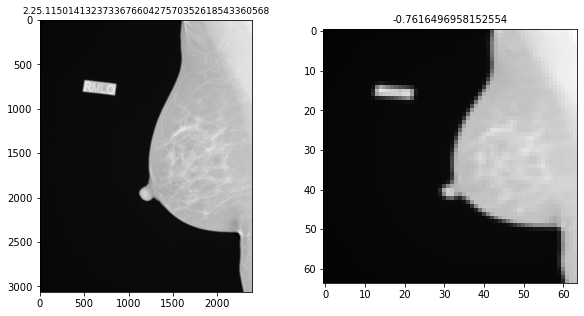

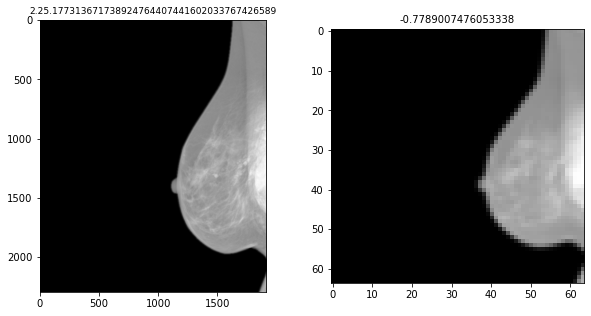

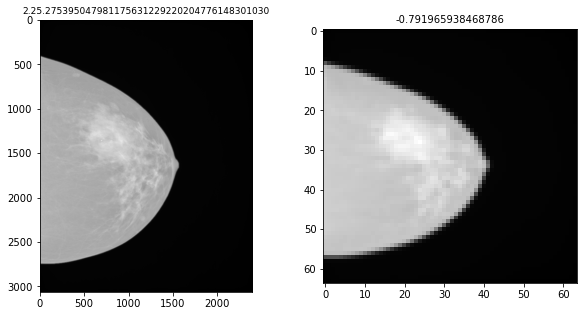

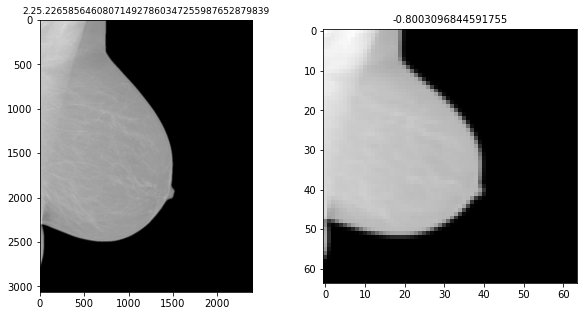

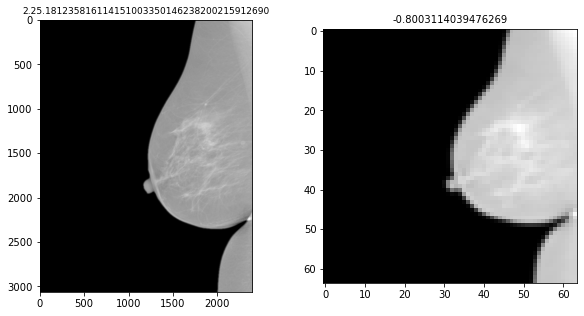

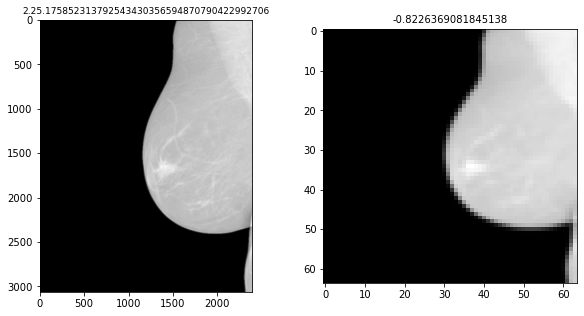

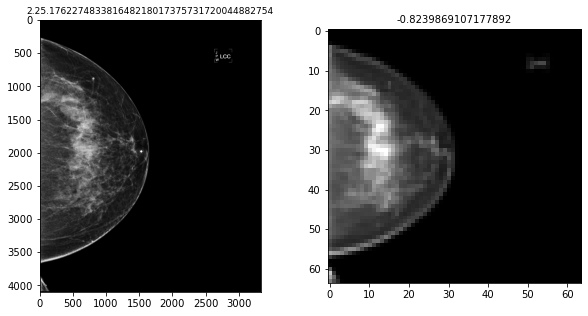

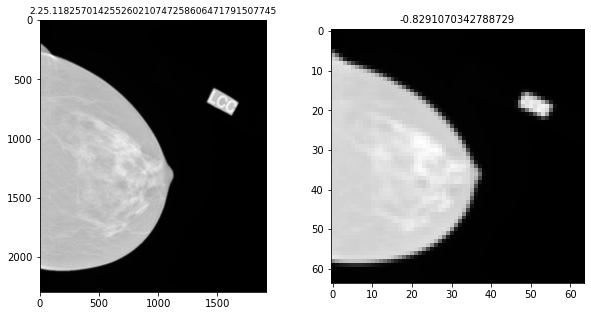

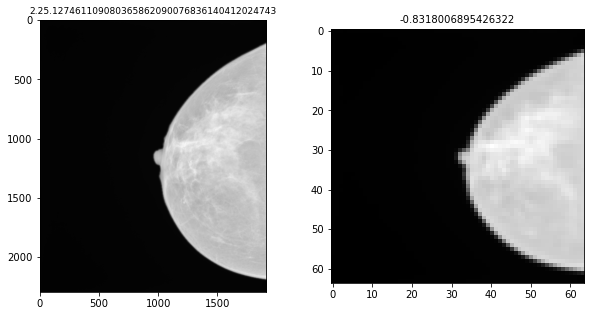

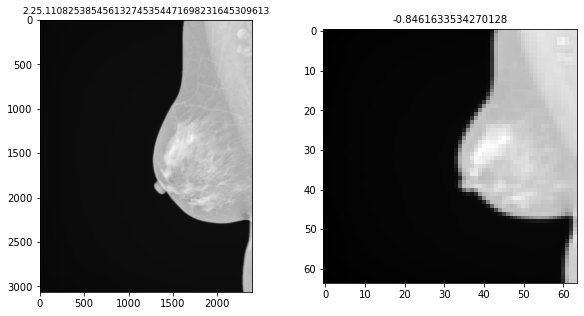

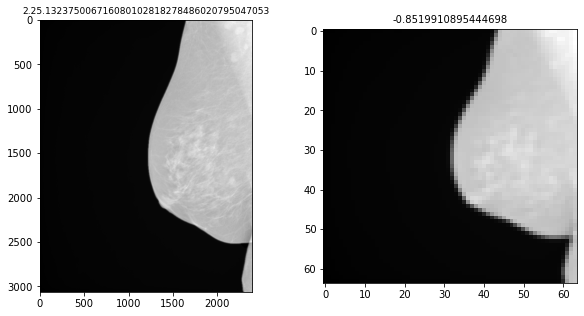

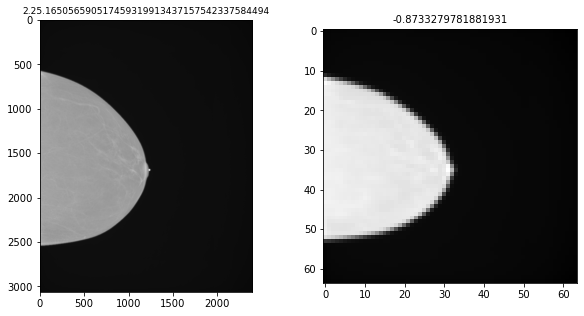

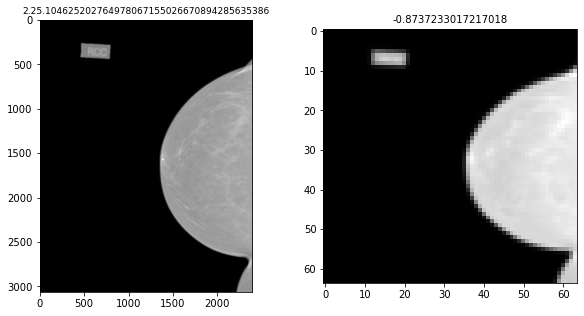

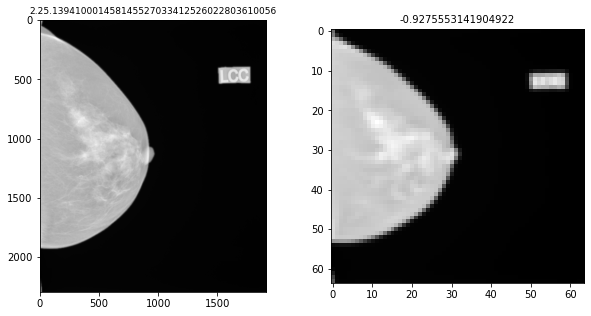

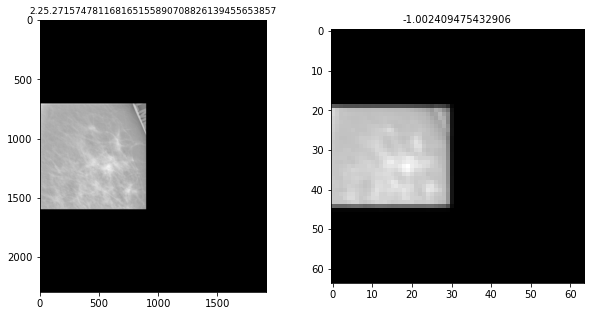

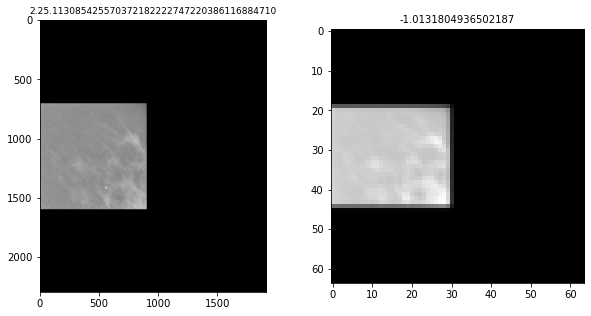

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='SUOD')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])

In [ ]:
# initialized a group of outlier detectors for acceleration
# detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
#                  LOF(n_neighbors=25), LOF(n_neighbors=35),
#                  COPOD(), IForest(n_estimators=100),
#                  IForest(n_estimators=200)]

# # decide the number of parallel process, and the combination method
# # then clf can be used as any outlier detection model
# clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
#            verbose=False)